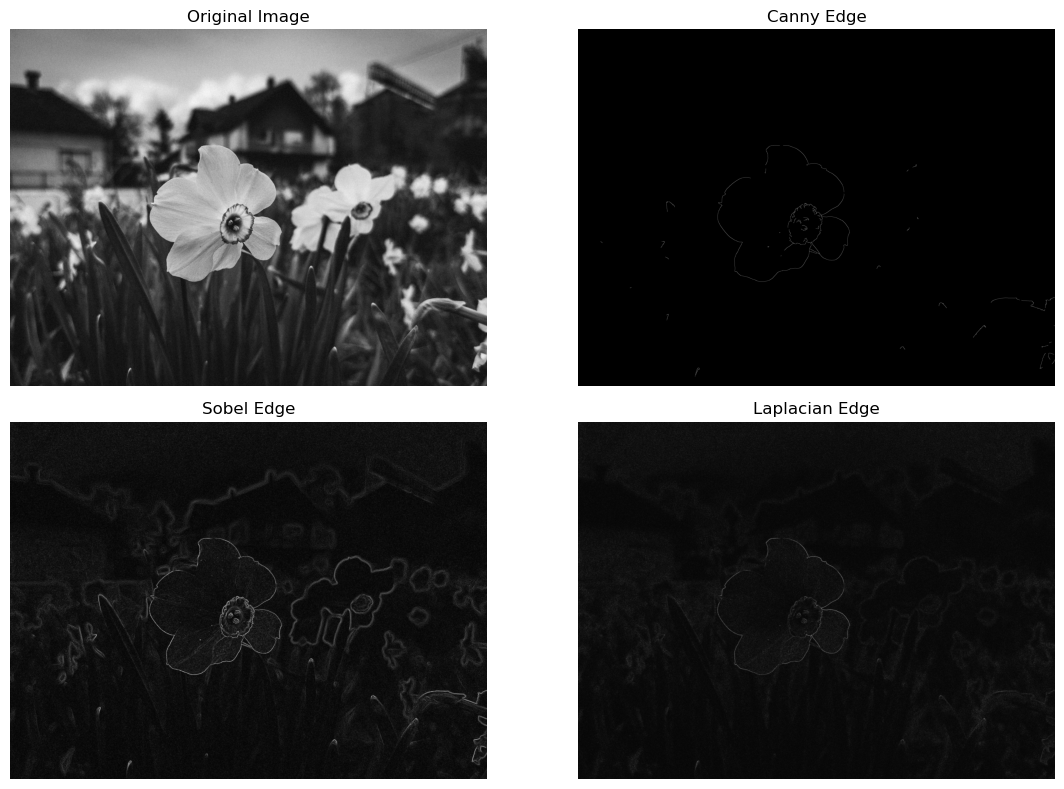

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('sample.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# ----- 1. CANNY EDGE DETECTION -----
canny_edges = cv2.Canny(blur, 100, 200)

# ----- 2. SOBEL EDGE DETECTION -----
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)
sobel_combined = np.uint8(np.absolute(sobel_combined))

# ----- 3. LAPLACIAN EDGE DETECTION -----
laplacian = cv2.Laplacian(blur, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

titles = ['Original Image', 'Canny Edge', 'Sobel Edge', 'Laplacian Edge']
images = [gray, canny_edges, sobel_combined, laplacian]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
